# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Muhammad Zakki Mubarroq
- **Email:** muhhamadzakki06@gmail.com
- **ID Dicoding:**  MS163D5Y0589

## Menentukan Pertanyaan Bisnis

- 1. Produk dari Kategori Apa Saja yang Paling Banyak Dibeli tiap bulannya?
- 2. Dari daerah atau kota mana pelanggan berasal dan bagaimana sebaran penjualan        berdasarkan geolokasi?
- 3. Metode pembayaran apa yang paling sering digunakan

## Import Semua Packages/Library yang Digunakan

In [60]:
%pip install -r requirements.txt

## Data Wrangling

Pada tahapan ini kita akan melakuakn pengumumpulan data. Dataset yang digunakan adalah dataset yang berisi informasi tentang informasi transaksi e-commerce yang mencakup pelanggan, pesanan, produk, pembayaran, ulasan, serta lokasi geografis. Data pelanggan mencakup ID unik, lokasi, dan kode pos, sedangkan data pesanan mencakup status, waktu pemesanan, serta estimasi pengiriman. Informasi produk dan penjual mencakup kategori, harga, dimensi, serta lokasi penjual. Data pembayaran mencatat metode pembayaran, jumlah cicilan, dan total transaksi, sementara ulasan pelanggan mencakup skor, komentar, dan waktu ulasan. Dengan dataset ini, berbagai analisis dapat dilakukan, seperti perilaku pelanggan, efektivitas pengiriman, serta tren produk dan kepuasan pelanggan. Dataset ini di unduh melalui [Google Drive](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing).

### Gathering Data

In [1]:
## Import library yang diperlukan
import pandas as pd
from pathlib import Path
from tqdm import tqdm

### Menentukan direktori data
data_direktori = Path('data/')

### Mencari semua file CSV di direktori
csv_files = list(data_direktori.glob('*.csv'))

### Memeriksa apakah direktori ada dan berisi file CSV
if not data_direktori.exists():
    raise FileNotFoundError(f"Tidak ditemukan direktori {data_direktori}.")
elif not csv_files:
    raise FileNotFoundError(f"Tidak ditemukan file CSV di dalam {data_direktori}.")

print(f"Ditemukan {len(csv_files)} file CSV di direktori {data_direktori}.")

### Membaca setiap file CSV dan menyimpannya dalam list
list_data = []

for file in tqdm(csv_files, desc="Membaca file CSV"):
    try:
        df = pd.read_csv(file)
        list_data.append(df)
        print(f"Berhasil membaca {file.name} dengan {df.shape[0]} baris dan {df.shape[1]} kolom.")
    except Exception as e:
        print(f"Gagal membaca {file.name}: {e}")

### Menggabungkan semua DataFrame berdasarkan kolom yang sama
if not list_data:
    raise ValueError("Tidak ada data yang berhasil dibaca.")

table = list_data[0]  # Inisialisasi dengan DataFrame pertama

for df in list_data[1:]:
    common_columns = list(set(table.columns) & set(df.columns))  # Mencari kolom yang sama
    if common_columns:
        table = table.merge(df, on=common_columns, how='outer')  # Menggabungkan dengan merge
    else:
        print(f"Perhatian: Tidak ada kolom yang cocok untuk penggabungan dengan {df.shape}")

print(f"Data gabungan memiliki {table.shape[0]} baris dan {table.shape[1]} kolom.")

### Menampilkan 5 baris pertama hasil gabungan
table.head()


Ditemukan 9 file CSV di direktori data.


Membaca file CSV:  11%|█         | 1/9 [00:00<00:01,  6.07it/s]

Berhasil membaca customers_dataset.csv dengan 99441 baris dan 5 kolom.


Membaca file CSV:  22%|██▏       | 2/9 [00:00<00:02,  2.97it/s]

Berhasil membaca geolocation_dataset.csv dengan 1000163 baris dan 5 kolom.


Membaca file CSV:  33%|███▎      | 3/9 [00:00<00:01,  3.08it/s]

Berhasil membaca orders_dataset.csv dengan 99441 baris dan 8 kolom.


Membaca file CSV:  44%|████▍     | 4/9 [00:01<00:01,  3.62it/s]

Berhasil membaca order_items_dataset.csv dengan 112650 baris dan 7 kolom.


Membaca file CSV:  56%|█████▌    | 5/9 [00:01<00:01,  3.13it/s]

Berhasil membaca order_payments_dataset.csv dengan 103886 baris dan 5 kolom.


Membaca file CSV: 100%|██████████| 9/9 [00:01<00:00,  4.50it/s]

Berhasil membaca order_reviews_dataset.csv dengan 99224 baris dan 7 kolom.
Berhasil membaca products_dataset.csv dengan 32951 baris dan 9 kolom.
Berhasil membaca product_category_name_translation.csv dengan 71 baris dan 2 kolom.
Berhasil membaca sellers_dataset.csv dengan 3095 baris dan 4 kolom.
Perhatian: Tidak ada kolom yang cocok untuk penggabungan dengan (1000163, 5)


Data gabungan memiliki 119143 baris dan 40 kolom.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,d7fc82cbeafea77bd0a8fbbf6296e387,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,...,849.0,2.0,11800.0,40.0,43.0,36.0,small_appliances,9080.0,santo andre,SP
1,d9442164acf4b03109425633efaa0cfc,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,...,849.0,2.0,11800.0,40.0,43.0,36.0,small_appliances,9080.0,santo andre,SP
2,944b72539d7e1f7f7fc6e46639ef1fe3,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,...,849.0,2.0,11800.0,40.0,43.0,36.0,small_appliances,9080.0,santo andre,SP
3,2fde2146af0116e4451b544145e05cc3,52dea3631aa7ae55b1fc52a767908327,39402,montes claros,MG,0bea543455029a72056bd0e781a8dca7,delivered,2017-07-23 11:22:00,2017-07-25 03:45:20,2017-07-26 19:53:24,...,449.0,3.0,10900.0,39.0,12.0,42.0,construction_tools_construction,29156.0,cariacica,ES
4,85bafe3d80825d6b170ca29b0f0a41bb,5f3b967e209c49a714e3b9c83d0c4f15,91110,porto alegre,RS,15d972c5dd4501e8d219acbe1bea1519,delivered,2017-07-16 20:59:06,2017-07-18 06:05:36,2017-07-19 20:07:58,...,449.0,3.0,10900.0,39.0,12.0,42.0,construction_tools_construction,29156.0,cariacica,ES


**Insight:**
-  Datasets memiliki 9 file dengan format .csv
-  Data Gabungan memiliki 45 kolom dan 1550922 baris
-  Data mencakup informasi lebih dari 99.000 pelanggan dan lebih dari 32.000 produk yang dijual, memberikan gambaran yang komprehensif tentang pola transaksi dan kepuasan pelanggan.

### Assessing Data

Pada tahap ini, kita akan melakukan analisis data untuk menilai data yang nantinya akan digunakan struktur, kualitas dan isinya sebelum dilakukan lebih lanjut.

In [2]:
### Melihat informasi dasar dataset
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [3]:
### Menmpailkan data secara statistik
table.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,119143.000000,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000
mean,35033.451298,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413
std,29823.198969,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11250.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24240.000000,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58475.000000,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [4]:
### Menmpailkan Jumlah Nilai yang hilang  per kolom
table.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154


In [5]:
### Menmpailkan jumla nlia yang unik
print("Jumlah nilai unik per kolom:")
for column in table.select_dtypes(include=['object']).columns:
    unique_values = table[column].nunique()
    print(f"- {column}: {unique_values} nilai unik")

Jumlah nilai unik per kolom:
- customer_id: 99441 nilai unik
- customer_unique_id: 96096 nilai unik
- customer_city: 4119 nilai unik
- customer_state: 27 nilai unik
- order_id: 99441 nilai unik
- order_status: 8 nilai unik
- order_purchase_timestamp: 98875 nilai unik
- order_approved_at: 90733 nilai unik
- order_delivered_carrier_date: 81018 nilai unik
- order_delivered_customer_date: 95664 nilai unik
- order_estimated_delivery_date: 459 nilai unik
- product_id: 32951 nilai unik
- seller_id: 3095 nilai unik
- shipping_limit_date: 93318 nilai unik
- payment_type: 5 nilai unik
- review_id: 98410 nilai unik
- review_comment_title: 4527 nilai unik
- review_comment_message: 36159 nilai unik
- review_creation_date: 636 nilai unik
- review_answer_timestamp: 98248 nilai unik
- product_category_name: 73 nilai unik
- product_category_name_english: 71 nilai unik
- seller_city: 611 nilai unik
- seller_state: 23 nilai unik


**Insight:**
*  # Informasi Dasar Dataset 

      Dataset ini terdiri dari total **1.550.922** entri dengan **45 kolom** yang mencakup berbagai aspek transaksi pelanggan, geolokasi, pesanan, pembayaran, ulasan, hingga detail produk dan penjual. Berikut adalah rincian informasi dari masing-masing kolom:
      
      ## 1. Informasi Pelanggan
      - **customer_id** memiliki **198.882** nilai non-null, yang merepresentasikan ID unik pelanggan.
      - **customer_unique_id** memiliki **99.441** nilai non-null, menunjukkan pelanggan yang unik berdasarkan transaksi.
      - **customer_zip_code_prefix** memiliki **99.441** nilai non-null dengan tipe data **float64**, menunjukkan kode pos pelanggan.
      - **customer_city** memiliki **99.441** nilai non-null, menampilkan nama kota tempat pelanggan berada.
      - **customer_state** memiliki **99.441** nilai non-null, mengindikasikan negara bagian tempat pelanggan berada.
      
      ## 2. Informasi Geolokasi
      - **geolocation_zip_code_prefix** memiliki **1.000.163** nilai non-null, yang menunjukkan kode pos berdasarkan lokasi geografis.
      - **geolocation_lat** memiliki **1.000.163** nilai non-null dengan tipe data **float64**, yang merepresentasikan garis lintang lokasi pelanggan.
      - **geolocation_lng** memiliki **1.000.163** nilai non-null dengan tipe data **float64**, yang menunjukkan garis bujur lokasi pelanggan.
      - **geolocation_city** memiliki **1.000.163** nilai non-null, menyajikan nama kota berdasarkan lokasi geografis.
      - **geolocation_state** memiliki **1.000.163** nilai non-null, yang menunjukkan negara bagian berdasarkan lokasi geografis.
      
      ## 3. Informasi Pesanan
      - **order_id** memiliki **415.201** nilai non-null, yang merupakan ID unik setiap pesanan.
      - **order_status** memiliki **99.441** nilai non-null, menunjukkan status pesanan.
      - **order_purchase_timestamp** memiliki **99.441** nilai non-null dengan tipe data **object**, yang merepresentasikan waktu pembelian pesanan.
      - **order_approved_at** memiliki **99.281** nilai non-null, yang menunjukkan waktu persetujuan pesanan.
      - **order_delivered_carrier_date** memiliki **97.658** nilai non-null, merepresentasikan tanggal pesanan dikirim oleh kurir.
      - **order_delivered_customer_date** memiliki **96.476** nilai non-null, yang menunjukkan tanggal pesanan diterima oleh pelanggan.
      - **order_estimated_delivery_date** memiliki **99.441** nilai non-null, yang mencerminkan tanggal estimasi pengiriman pesanan.
      
      ## 4. Informasi Produk dan Penjual
      - **order_item_id** memiliki **112.650** nilai non-null, yang merepresentasikan ID unik barang dalam pesanan.
      - **product_id** memiliki **145.601** nilai non-null, yang menunjukkan ID unik produk.
      - **seller_id** memiliki **115.745** nilai non-null, merepresentasikan ID unik penjual.
      - **shipping_limit_date** memiliki **112.650** nilai non-null, menunjukkan batas waktu pengiriman pesanan.
      - **price** memiliki **112.650** nilai non-null dengan tipe data **float64**, yang menampilkan harga produk dalam transaksi.
      - **freight_value** memiliki **112.650** nilai non-null, menunjukkan biaya pengiriman dalam transaksi.
      
      ## 5. Informasi Pembayaran
      - **payment_sequential** memiliki **103.886** nilai non-null, yang merepresentasikan urutan pembayaran dalam transaksi.
      - **payment_type** memiliki **103.886** nilai non-null, menunjukkan metode pembayaran yang digunakan.
      - **payment_installments** memiliki **103.886** nilai non-null, yang mengindikasikan jumlah cicilan pembayaran.
      - **payment_value** memiliki **103.886** nilai non-null dengan tipe data **float64**, yang merepresentasikan nilai total pembayaran dalam transaksi.
      
      ## 6. Informasi Ulasan Produk
      - **review_id** memiliki **99.224** nilai non-null, yang menunjukkan ID unik ulasan pelanggan.
      - **review_score** memiliki **99.224** nilai non-null dengan tipe data **float64**, menunjukkan skor ulasan dari pelanggan.
      - **review_comment_title** memiliki **11.568** nilai non-null, yang mencerminkan judul ulasan pelanggan.
      - **review_comment_message** memiliki **40.977** nilai non-null, menunjukkan isi komentar ulasan pelanggan.
      - **review_creation_date** memiliki **99.224** nilai non-null, yang merepresentasikan tanggal pembuatan ulasan.
      - **review_answer_timestamp** memiliki **99.224** nilai non-null, yang menunjukkan waktu penjawaban ulasan dari sistem atau penjual.
      
      ## 7. Informasi Detail Produk
      - **product_category_name** memiliki **32.412** nilai non-null, yang menunjukkan kategori produk dalam bahasa asli.
      - **product_name_lenght** memiliki **32.341** nilai non-null, merepresentasikan panjang nama produk dalam jumlah karakter.
      - **product_description_lenght** memiliki **32.341** nilai non-null, yang menunjukkan panjang deskripsi produk dalam jumlah karakter.
      - **product_photos_qty** memiliki **32.341** nilai non-null, yang mencerminkan jumlah foto produk yang tersedia.
      - **product_weight_g** memiliki **32.949** nilai non-null, yang menunjukkan berat produk dalam gram.
      - **product_length_cm** memiliki **32.949** nilai non-null, merepresentasikan panjang produk dalam satuan sentimeter.
      - **product_height_cm** memiliki **32.949** nilai non-null, menunjukkan tinggi produk dalam satuan sentimeter.
      - **product_width_cm** memiliki **32.949** nilai non-null, yang menunjukkan lebar produk dalam satuan sentimeter.
      - **product_category_name_english** memiliki **71** nilai non-null, yang menunjukkan kategori produk dalam bahasa Inggris.
      
      ## 8. Informasi Penjual
      - **seller_zip_code_prefix** memiliki **3.095** nilai non-null, menunjukkan kode pos dari lokasi penjual.
      - **seller_city** memiliki **3.095** nilai non-null, yang mencerminkan nama kota tempat penjual berada.
      - **seller_state** memiliki **3.095** nilai non-null, yang menunjukkan negara bagian tempat penjual berada.
      
      ## 9. Ringkasan
      - Dataset ini memiliki **532.5+ MB** dalam ukuran memori.
      - Sebagian besar kolom memiliki tipe data **object** dan **float64**.
      - Ada beberapa kolom yang memiliki banyak nilai **null**, terutama pada informasi ulasan dan detail produk.
      - Dataset ini mencakup berbagai aspek transaksi e-commerce, dari pelanggan hingga ulasan produk.
      
      Dengan memahami struktur dataset ini, kita dapat lebih mudah menganalisis serta mengolah data untuk berbagai keperluan bisnis maupun penelitian.
      


  * # Informasi Data statistik
     
     **Statistik Deskriptif:**

      ### **Kode Pos (Zip Code):**
      - **customer_zip_code_prefix** memiliki rata-rata **35137.47**, dengan nilai minimum **1003** dan maksimum **99990**.
      - **geolocation_zip_code_prefix** memiliki rata-rata **36,574.17**, dengan nilai minimum **1001** dan maksimum **99990**.
      - **seller_zip_code_prefix** memiliki rata-rata **32291.06**, dengan nilai minimum **1001** dan maksimum **99730**.

      ### **Geolokasi:**
      - **geolocation_lat** memiliki rata-rata **-21.18**, dengan nilai minimum **-36.61** dan maksimum **45.07**.
      - **geolocation_lng** memiliki rata-rata **-46.39**, dengan nilai minimum **-101.47** dan maksimum **121.11**.

      ### **Pesanan dan Pembayaran:**
      - **order_item_id** memiliki rata-rata **1.20**, dengan nilai minimum **1** dan maksimum **21**.
      - **price** memiliki rata-rata **120.65**, dengan nilai minimum **0.85** dan maksimum **6735**.
      - **freight_value** memiliki rata-rata **19.99**, dengan nilai minimum **0.00** dan maksimum **409.68**.
      - **payment_sequential** memiliki rata-rata **1.09**, dengan nilai minimum **1** dan maksimum **29**.
      - **payment_installments** memiliki rata-rata **2.85**, dengan nilai minimum **0** dan maksimum **24**.
      - **payment_value** memiliki rata-rata **154.10**, dengan nilai minimum **0.00** dan maksimum **13664.08**.

      ### **Rating dan Ulasan:**
      - **review_score** memiliki rata-rata **4.09**, dengan nilai minimum **1** dan maksimum **5**.

      ### **Deskripsi Produk:**
      - **product_name_length** memiliki rata-rata **48.48**, dengan nilai minimum **5** dan maksimum **76**.
      - **product_description_length** memiliki rata-rata **771.50**, dengan nilai minimum **4** dan maksimum **3992**.
      - **product_photos_qty** memiliki rata-rata **2.19**, dengan nilai minimum **1** dan maksimum **20**.

      ### **Dimensi dan Berat Produk:**
      - **product_weight_g** memiliki rata-rata **2276.47**, dengan nilai minimum **0** dan maksimum **40425**.
      - **product_length_cm** memiliki rata-rata **30.82**, dengan nilai minimum **7** dan maksimum **105**.
      - **product_height_cm** memiliki rata-rata **16.94**, dengan nilai minimum **2** dan maksimum **105**.
      - **product_width_cm** memiliki rata-rata **23.20**, dengan nilai minimum **6** dan maksimum **118**.


* # Jumlah Nilai yang Hilang per Kolom:

    ### **Informasi Pelanggan:**
    - **customer_id** memiliki **1,352,040** nilai yang hilang.
    - **customer_unique_id** memiliki **1,451,481** nilai yang hilang.
    - **customer_zip_code_prefix** memiliki **1,451,481** nilai yang hilang.
    - **customer_city** memiliki **1,451,481** nilai yang hilang.
    - **customer_state** memiliki **1,451,481** nilai yang hilang.
    
    ### **Geolokasi:**
    - **geolocation_zip_code_prefix** memiliki **550,759** nilai yang hilang.
    - **geolocation_lat** memiliki **550,759** nilai yang hilang.
    - **geolocation_lng** memiliki **550,759** nilai yang hilang.
    - **geolocation_city** memiliki **550,759** nilai yang hilang.
    - **geolocation_state** memiliki **550,759** nilai yang hilang.
    
    ### **Informasi Pesanan:**
    - **order_id** memiliki **1,135,721** nilai yang hilang.
    - **order_status** memiliki **1,451,481** nilai yang hilang.
    - **order_purchase_timestamp** memiliki **1,451,481** nilai yang hilang.
    - **order_approved_at** memiliki **1,451,641** nilai yang hilang.
    - **order_delivered_carrier_date** memiliki **1,453,264** nilai yang hilang.
    - **order_delivered_customer_date** memiliki **1,454,446** nilai yang hilang.
    
    ### **Informasi Pembayaran:**
    - **payment_sequential** memiliki **1,447,036** nilai yang hilang.
    - **payment_type** memiliki **1,447,036** nilai yang hilang.
    - **payment_installments** memiliki **1,447,036** nilai yang hilang.
    - **payment_value** memiliki **1,447,036** nilai yang hilang.
    
    ### **Ulasan Produk:**
    - **review_id** memiliki **1,451,698** nilai yang hilang.
    - **review_score** memiliki **1,451,698** nilai yang hilang.
    - **review_comment_title** memiliki **1,539,354** nilai yang hilang.
    - **review_comment_message** memiliki **1,509,945** nilai yang hilang.
    
    ### **Informasi Produk:**
    - **product_category_name** memiliki **1,518,510** nilai yang hilang.
    - **product_name_length** memiliki **1,518,581** nilai yang hilang.
    - **product_description_length** memiliki **1,518,581** nilai yang hilang.
    - **product_photos_qty** memiliki **1,518,581** nilai yang hilang.
    
    ### **Dimensi dan Berat Produk:**
    - **product_weight_g** memiliki **1,517,973** nilai yang hilang.
    - **product_length_cm** memiliki **1,517,973** nilai yang hilang.
    - **product_height_cm** memiliki **1,517,973** nilai yang hilang.
    - **product_width_cm** memiliki **1,517,973** nilai yang hilang.
    
    ### **Informasi Penjual:**
    - **seller_zip_code_prefix** memiliki **1,547,827** nilai yang hilang.
    - **seller_city** memiliki **1,547,827** nilai yang hilang.
    - **seller_state** memiliki **1,547,827** nilai yang hilang.



* # Jumlah Nilai Unik per Kolom:

    ### **Informasi Pelanggan:**
    - **customer_id**: **99,441** nilai unik.
    - **customer_unique_id**: **96,096** nilai unik.
    - **customer_city**: **4,119** nilai unik.
    - **customer_state**: **27** nilai unik.

    ### **Geolokasi:**
    - **geolocation_city**: **8,011** nilai unik.
    - **geolocation_state**: **27** nilai unik.

    ### **Informasi Pesanan:**
    - **order_id**: **99,441** nilai unik.
    - **order_status**: **8** nilai unik.
    - **order_purchase_timestamp**: **98,875** nilai unik.
    - **order_approved_at**: **90,733** nilai unik.
    - **order_delivered_carrier_date**: **81,018** nilai unik.
    - **order_delivered_customer_date**: **95,664** nilai unik.
    - **order_estimated_delivery_date**: **459** nilai unik.

    ### **Informasi Produk & Penjual:**
    - **product_id**: **32,951** nilai unik.
    - **seller_id**: **3,095** nilai unik.
    - **shipping_limit_date**: **93,318** nilai unik.

    ### **Informasi Pembayaran:**
    - **payment_type**: **5** nilai unik.

    ### **Ulasan Produk:**
    - **review_id**: **98,410** nilai unik.
    - **review_comment_title**: **4,527** nilai unik.
    - **review_comment_message**: **36,159** nilai unik.
    - **review_creation_date**: **636** nilai unik.
    - **review_answer_timestamp**: **98,248** nilai unik.

    ### **Kategori Produk:**
    - **product_category_name**: **73** nilai unik.
    - **product_category_name_english**: **71** nilai unik.

    ### **Informasi Penjual:**
    - **seller_city**: **611** nilai unik.
    - **seller_state**: **23** nilai unik.

### Cleaning Data

Pada tahapan ini, kita akan melakukan pembersihan data untuk memastikan kualitas data sebelum digunakan dalam analisis lebih lanjut. Pembersihan ini mencakup beberapa langkah penting untuk mengatasi masalah seperti nilai hilang, duplikasi, dan konsistensi data.

1. **Menangani Nilai yang Hilang:**
   - Mengisi nilai yang hilang pada kolom numerik dengan **median** agar tidak terpengaruh oleh outlier.
   - Mengisi nilai yang hilang pada kolom kategorikal dengan **modus** atau kategori khusus seperti `'Unknown'` jika data kategorikal penting.
   
2. **Menghapus Duplikasi:**
   - Memeriksa dan menghapus **baris duplikat** yang mungkin ada pada data untuk mencegah analisis yang salah akibat data yang terduplikasi.
   

3. **Menghapus Outliers**
    - Ini penting agar analisis tidak terdistorsi oleh nilai-nilai ekstrem yang tidak mewakili pola umum data. Jadi, meskipun tidak termasuk dalam empat langkah yang kamu sebutkan, penghapusan outliers merupakan langkah tambahan yang sangat berguna dalam menyiapkan data untuk analisis.

**Mengani nilia yang hilang**

Dalam proses analisis data, menangani nilai yang hilang merupakan langkah krusial untuk memastikan kualitas dan keakuratan hasil. Kode di atas menggunakan pendekatan berbeda untuk menangani nilai yang hilang pada kolom numerik dan kategorikal. Untuk kolom numerik (integer dan float), nilai yang hilang diisi dengan median dari masing-masing kolom. Median dipilih karena lebih tahan terhadap outlier dibandingkan dengan rata-rata. Dengan demikian, nilai ekstrem tidak akan terlalu mempengaruhi pengisian data yang hilang.



In [6]:
number_value = table.select_dtypes(include=['integer', 'float']).columns.to_list()

table[number_value] = table[number_value].fillna(table[number_value].median())

categories = table.select_dtypes(include=['object']).columns.tolist()

for column in categories:
    value = table[column].value_counts().index[0]
    table[column] = table[column].fillna(value)

print("\nJumlah nilai yang hilang setelah penanganan:")
print(table.isnull().sum())


Jumlah nilai yang hilang setelah penanganan:
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_an

**Menghapus Duplikasi** 

Langkah selanjutnya dalah menghitung jumlah data yang terduplikasi dan menghapus duplikasi data tersebut selanjutnya memeriksa apakah data duplikasi masih ada atau tidak.

In [7]:
duplica_value = table.duplicated().sum()
print(f"\nJumlah data duplikasi: {duplica_value}")

table = table.drop_duplicates()

duplica_value_after = table.duplicated().sum()
print(f"\nJumlah data duplikasi setelah dihapus: {duplica_value_after}")

duplicate_count = table.duplicated().sum()
print(f"\nJumlah duplikasi sesudah penghapusan: {duplicate_count}")


Jumlah data duplikasi: 0

Jumlah data duplikasi setelah dihapus: 0

Jumlah duplikasi sesudah penghapusan: 0


**Menghapus Outlliers**

Outliers merupakan data yang berbeda jauh dari data lain, yang dapat menyebabkan kesalahan analisis. 


In [8]:

# Fungsi untuk menghapus outliers pada suatu kolom menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Mengembalikan DataFrame hanya dengan baris yang nilainya berada di dalam rentang
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Daftar kolom numerik yang ingin dicek outliers-nya
cols_to_check = [
    'price',                   # Harga Produk
    'freight_value',           # Biaya Pengiriman
    'payment_value',           # Total Pembayaran
    'product_description_lenght', # Panjang Deskripsi Produk
    'product_weight_g',        # Berat Produk dalam Gram
    'product_length_cm',       # Panjang Produk dalam cm
    'product_height_cm',       # Tinggi Produk dalam cm
    'product_width_cm'         # Lebar Produk dalam cm
]

# Iterasi untuk setiap kolom dan hapus outliers menggunakan fungsi remove_outliers
for col in cols_to_check:
    initial_shape = table.shape  # Simpan jumlah baris awal
    table = remove_outliers(table, col)
    final_shape = table.shape    # Simpan jumlah baris setelah penghapusan outliers
    print(f"Kolom {col}: Mengurangi dari {initial_shape[0]} menjadi {final_shape[0]} baris.")

# Setelah proses, combined_df akan memiliki data yang telah dibersihkan dari outliers pada kolom yang diperiksa


Kolom price: Mengurangi dari 119143 menjadi 110163 baris.
Kolom freight_value: Mengurangi dari 110163 menjadi 99388 baris.
Kolom payment_value: Mengurangi dari 99388 menjadi 95022 baris.
Kolom product_description_lenght: Mengurangi dari 95022 menjadi 89043 baris.
Kolom product_weight_g: Mengurangi dari 89043 menjadi 80589 baris.
Kolom product_length_cm: Mengurangi dari 80589 menjadi 77826 baris.
Kolom product_height_cm: Mengurangi dari 77826 menjadi 75072 baris.
Kolom product_width_cm: Mengurangi dari 75072 menjadi 74015 baris.


**Insight:**  

**1.Menagani nilai yang hilang**
*   Kode ini menangani nilai yang hilang dengan dua pendekatan: kolom numerik diisi dengan median untuk menghindari pengaruh outlier, sementara kolom kategorikal diisi dengan modus (nilai paling sering muncul) untuk menjaga konsistensi data. Setelah itu, dilakukan pengecekan ulang menggunakan table.isnull().sum() untuk memastikan semua nilai yang hilang telah teratasi sebelum analisis lebih lanjut.

**2. Menghapus duplikasi**
*    Kode ini menghitung jumlah data yang terduplikasi dan menghapus duplikasi data tersebut selanjutnya. Setelah itu, dilakukan pengecekan ulang menggunakan table.duplicated().sum() dan table.drop_duplicates() untuk memastikan semua data duplikasi telah terhapus sebelum analisis lebih lanjut.
  

  
**3. Menghapus outlier**
*   Kode ini menghitung nilai outlier menggunakan IQR (Interquartile Range) dan menghapus outlier tersebut dari dataset. Setelah itu, dilakukan pengecekan ulang menggunakan table.isnull().sum() untuk memastikan semua outlier telah terhapus sebelum analisis lebih lanjut.


## Exploratory Data Analysis (EDA)  

**Analisis Data Penjualan dan Pelanggan**

**Pendahuluan**  
Analisis eksploratif data (EDA) dilakukan untuk memahami pola dalam data penjualan, pelanggan, serta faktor lain yang memengaruhi transaksi. Dalam studi ini, kita akan mengeksplorasi beberapa aspek penting menggunakan visualisasi data untuk mendapatkan wawasan lebih dalam tentang perilaku pasar.

**Metodologi**  
Kami menggunakan dataset yang berisi informasi terkait pesanan, pelanggan, penjual, dan ulasan produk. Analisis dilakukan dengan menggunakan teknik visualisasi untuk memahami pola distribusi dan tren yang muncul dalam data.

**Hasil Analisis**  
Berikut adalah lima fokus utama dalam analisis ini:

1. **Distribusi Harga Produk**
   - Memvisualisasikan bagaimana harga produk tersebar di seluruh transaksi.
   - Mengidentifikasi apakah ada pola harga tertentu yang mendominasi pasar.

2. **Distribusi Lokasi Pelanggan per Negara Bagian**
   - Menganalisis jumlah lokasi pelanggan berdasarkan negara bagian.
   - Mengidentifikasi wilayah dengan jumlah pelanggan terbanyak dan tersedikit.

3. **Tren Jumlah Pesanan per Bulan**
   - Menganalisis jumlah pesanan yang dilakukan pelanggan dalam periode waktu tertentu.
   - Memahami musim atau tren penjualan yang berpengaruh terhadap transaksi.

4. **Distribusi Skor Ulasan Produk**
   - Meneliti bagaimana pelanggan menilai produk yang mereka beli.
   - Melihat apakah mayoritas ulasan bersifat positif atau negatif.

5. **Kota dengan Penjual Terbanyak**
   - Mengidentifikasi kota yang menjadi pusat aktivitas penjualan.
   - Memahami konsentrasi penjual dan distribusi geografis mereka.

**Kesimpulan**  
Melalui analisis ini, kita dapat memahami bagaimana harga, ongkos kirim, tren pesanan, ulasan, dan lokasi penjual memengaruhi ekosistem e-commerce. Wawasan yang diperoleh dapat digunakan untuk meningkatkan strategi bisnis, optimasi logistik, serta meningkatkan kepuasan pelanggan.

1.  **Distribusi Harga Produk**

count    74015.000000
mean        69.804031
std         51.238838
min          0.850000
25%         29.990000
50%         55.000000
75%         91.000000
max        271.250000
Name: price, dtype: float64


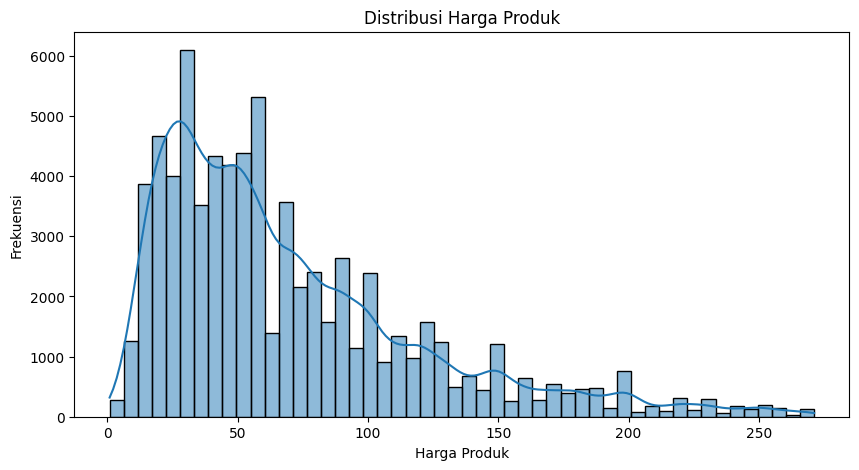

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan statistik harga produk
print(table["price"].describe())

# Membuat histogram distribusi harga produk
plt.figure(figsize=(10, 5))
sns.histplot(table['price'].dropna(), bins=50, kde=True)
plt.xlabel("Harga Produk")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Produk")
plt.show()


2. **Distribusi Lokasi Pelanggan per Negara Bagian**

count       10.000000
mean      5052.900000
std       2243.737183
min       2798.000000
25%       4029.500000
50%       4329.000000
75%       5585.750000
max      10455.000000
Name: count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2376\3449920170.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_product.values, y=df_product.index, palette="viridis")


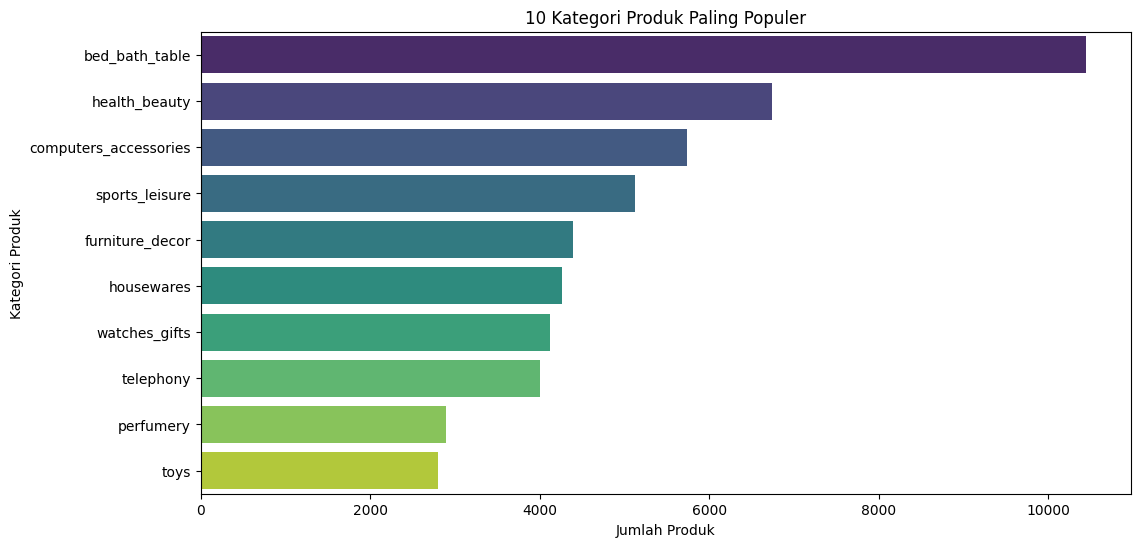

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah produk per kategori
df_product = table["product_category_name_english"].value_counts().head(10)  # Top 10 kategori
print(df_product.describe())
# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=df_product.values, y=df_product.index, palette="viridis")
plt.xlabel("Jumlah Produk")
plt.ylabel("Kategori Produk")
plt.title("10 Kategori Produk Paling Populer")
plt.show()


3. **Tren Jumlah Pesanan per Bulan**

count      25.000000
mean     2960.600000
std      2003.006719
min         1.000000
25%      1309.000000
50%      3144.000000
75%      4777.000000
max      5847.000000
Name: count, dtype: float64


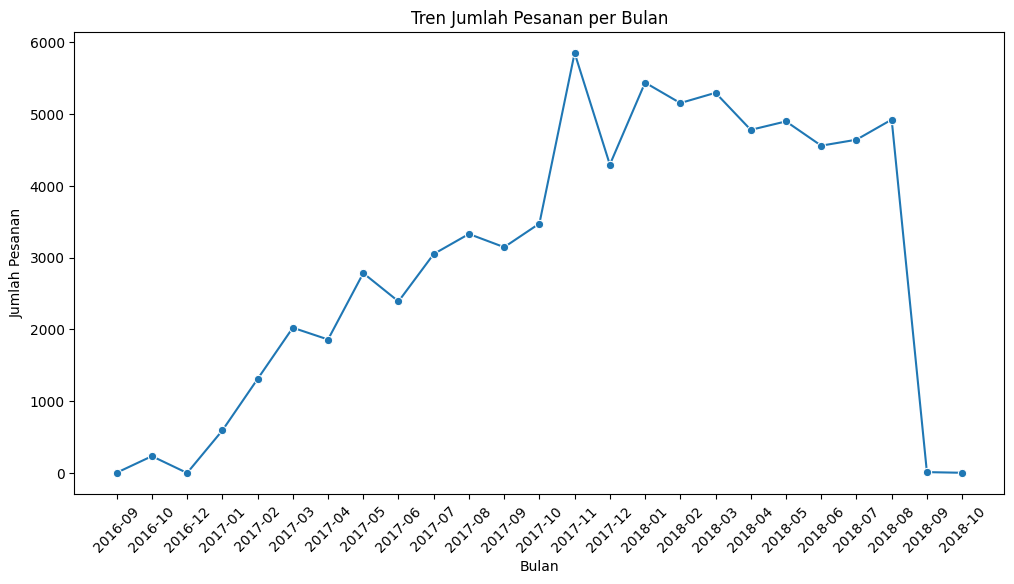

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table["order_purchase_timestamp"] = pd.to_datetime(table["order_purchase_timestamp"])
table['order_month'] = table['order_purchase_timestamp'].dt.to_period('M')

order_trend = table['order_month'].value_counts().sort_index()

print(order_trend.describe()) 

plt.figure(figsize=(12, 6))
sns.lineplot(x=order_trend.index.astype(str), y=order_trend.values, marker="o")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan per Bulan")
plt.xticks(rotation=45)
plt.show()


4. **Distribusi Skor Ulasan Produk**

count    74015.000000
mean         4.059164
std          1.375026
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2376\1851960129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=table["review_score"].dropna(), palette="coolwarm")


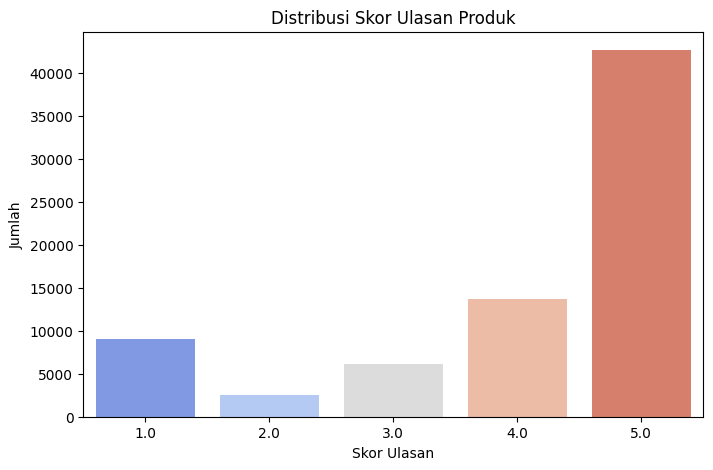

In [12]:
plt.figure(figsize=(8, 5))
print(table["review_score"].describe())
sns.countplot(x=table["review_score"].dropna(), palette="coolwarm")
plt.xlabel("Skor Ulasan")
plt.ylabel("Jumlah")
plt.title("Distribusi Skor Ulasan Produk")
plt.show()


5. **Kota dengan Penjual Terbanyak**

count       10.000000
mean      4217.600000
std       6201.096932
min       1433.000000
25%       1546.000000
50%       1914.000000
75%       2425.500000
max      21381.000000
Name: count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_2376\2150165336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_city_count.values, y=seller_city_count.index, palette="plasma")


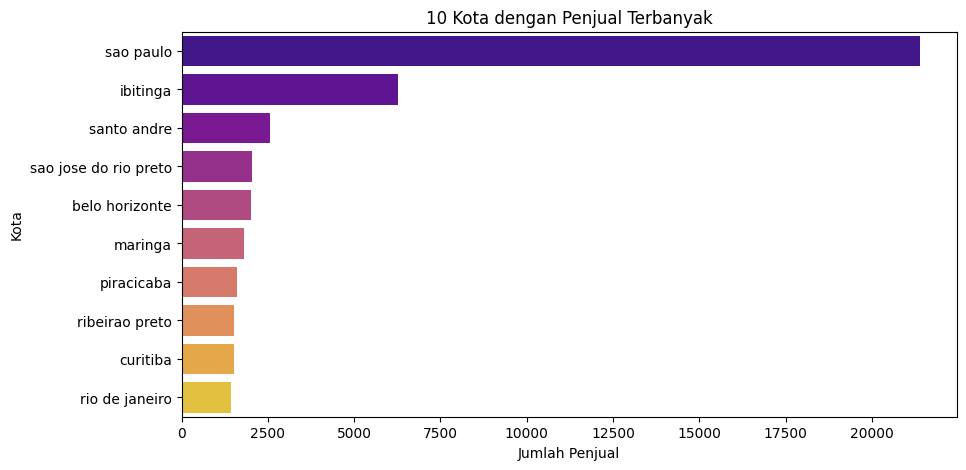

In [13]:
seller_city_count = table["seller_city"].value_counts().head(10)
print(seller_city_count.describe())  
plt.figure(figsize=(10, 5))
sns.barplot(x=seller_city_count.values, y=seller_city_count.index, palette="plasma")
plt.xlabel("Jumlah Penjual")
plt.ylabel("Kota")
plt.title("10 Kota dengan Penjual Terbanyak")
plt.show()


**Insight:**  
1. **Harga Produk**  
- Rata-rata: Rp69.804  
- Median: Rp55.000  
- Maksimum: Rp271.250  
- Sebagian besar harga produk berada dalam rentang Rp29.990 hingga Rp91.000, dengan beberapa produk premium mencapai harga tertinggi.**
 
2. **Kategori Prouduk Paling Populer**  
  - Rata-rata: 5.052 produk  
  - Maksimum: 10.455 produk  
  - Sebagian besar kategori memiliki jumlah penjualan di kisaran 4.029 hingga 5.585 produk, dengan beberapa kategori unggulan yang mencapai lebih dari 10.000 penjualan.  
3. **Jumlah Pesanan Per Bulan**  
- Rata-rata: 2.961 pesanan  
- Maksimum: 5.847 pesanan  
- Fluktuasi per bulan cukup besar, yang menandakan perlunya strategi stok yang lebih fleksibel.  

4. **Rating Produk**   
  - Rata-rata: 4.06  
  - Median: 5  
  - Sebagian besar pelanggan memberikan rating tinggi, namun masih ada beberapa ulasan negatif.

5. **Kota dengan Penjualan Terbanyak**  
  - Rata-rata: 4.217 penjualan  
  - Maksimum: 21.381 penjualan  
  - Kota dengan penjualan tertinggi menunjukkan adanya pusat distribusi atau permintaan yang tinggi di wilayah tertentu.  
  


## Visualization & Explanatory Analysis

### Pertanyaan 1:  
**1. Produk dari Kategori Apa Saja yang Paling Banyak Dibeli Tiap Bulannya?**  
*   kita dapat melihat **tren penjualan** dan mengetahui kategori produk mana yang paling diminati pelanggan setiap bulan.  


**Langkah Analisis Data**  

* Pastikan kolom order_purchase_timestamp dikonversi ke datetime

* Buat kolom baru 'purchase_month' dalam format YYYY-MM

* Kelompokkan data berdasarkan bulan dan kategori produk, hitung jumlah pembelian

* Gunakan pivot table untuk memudahkan visualisasi (bar chart bertumpuk)


**Produk dari Kategori yang Paling Banyak Dibeli Tiap Bulan**
     purchase_month        product_category_name  purchase_count
0           2016-09                 beleza_saude               3
20          2016-10             moveis_decoracao              51
27          2016-12  fashion_bolsas_e_acessorios               1
52          2017-01             moveis_decoracao             148
67          2017-02              cama_mesa_banho             234
112         2017-03              cama_mesa_banho             342
159         2017-04              cama_mesa_banho             325
210         2017-05              cama_mesa_banho             441
259         2017-06              cama_mesa_banho             397
310         2017-07              cama_mesa_banho             508
359         2017-08              cama_mesa_banho             473
413         2017-09              cama_mesa_banho             486
470         2017-10              cama_mesa_banho             550
525         2017-11         

C:\Users\user\AppData\Local\Temp\ipykernel_2376\3714200583.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


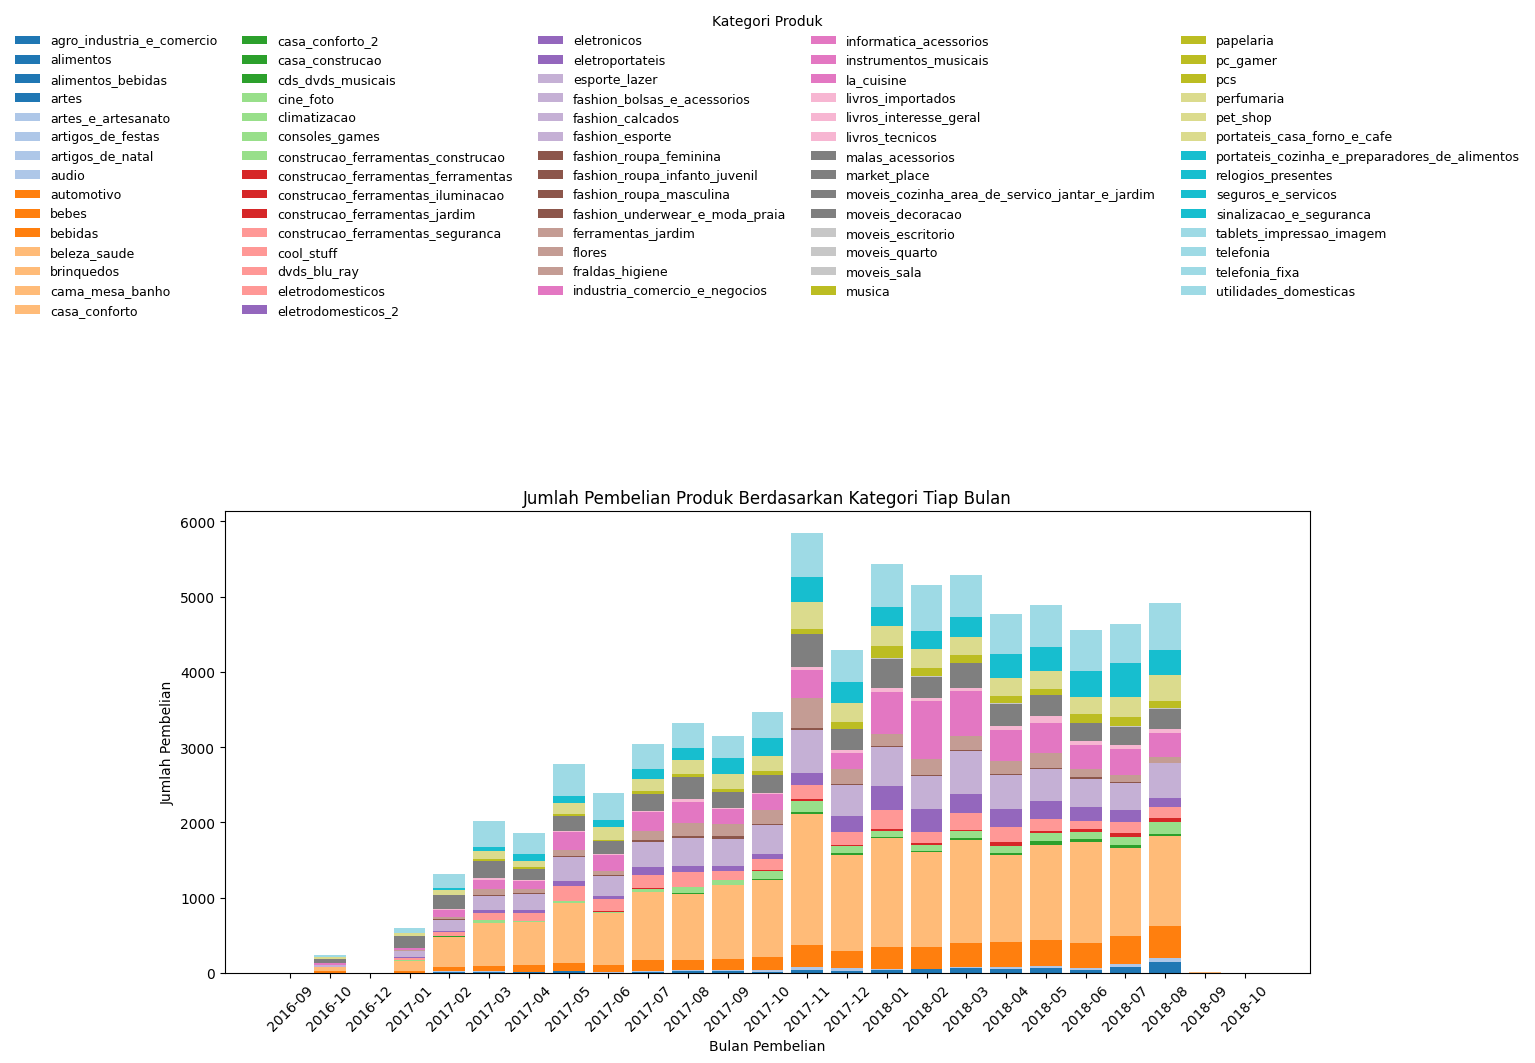

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pastikan kolom order_purchase_timestamp dikonversi ke datetime
table['order_purchase_timestamp'] = pd.to_datetime(table['order_purchase_timestamp'])
# Buat kolom baru 'purchase_month' dalam format YYYY-MM
table['purchase_month'] = table['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Kelompokkan data berdasarkan bulan dan kategori produk, hitung jumlah pembelian
monthly_category_counts = table.groupby(['purchase_month', 'product_category_name'])['order_item_id'].count().reset_index()
monthly_category_counts.rename(columns={'order_item_id': 'purchase_count'}, inplace=True)

# Menentukan kategori dengan jumlah pembelian terbanyak tiap bulan
top_category_per_month = monthly_category_counts.loc[monthly_category_counts.groupby('purchase_month')['purchase_count'].idxmax()]

# Tampilkan tabel ringkasan
print("**Produk dari Kategori yang Paling Banyak Dibeli Tiap Bulan**")
print(top_category_per_month[['purchase_month', 'product_category_name', 'purchase_count']])

# Tampilkan statistik ringkasan
describe_summary = monthly_category_counts['purchase_count'].describe()
print("\n**Ringkasan Statistik Jumlah Pembelian**")
print(describe_summary)

# Visualisasi data dengan stacked bar chart
plt.figure(figsize=(14, 6))
bar_width = 0.8
x = np.arange(len(monthly_category_counts['purchase_month'].unique()))  
colors = plt.cm.tab20(np.linspace(0, 1, len(monthly_category_counts['product_category_name'].unique())))

# Pivot data agar lebih mudah divisualisasikan
pivot_data = monthly_category_counts.pivot(index='purchase_month', columns='product_category_name', values='purchase_count').fillna(0)

# Plot setiap kategori produk
bottoms = np.zeros(len(pivot_data.index))
for i, column in enumerate(pivot_data.columns):
    plt.bar(x, pivot_data[column], width=bar_width, bottom=bottoms, label=column, color=colors[i])
    bottoms += pivot_data[column]

# Menambahkan judul dan label
plt.title('Jumlah Pembelian Produk Berdasarkan Kategori Tiap Bulan')
plt.xlabel('Bulan Pembelian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(x, pivot_data.index, rotation=45)
plt.legend(title='Kategori Produk', bbox_to_anchor=(0.5, 2.1), loc='upper center', ncol=5, frameon=False, fontsize=9)
plt.tight_layout()
plt.show()


### Pertanyaan 2:
 **2.Dari daerah atau kota mana pelanggan berasal dan bagaimana sebaran penjualan berdasarkan geolokasi?**
 
 *   Dengan menganalisis **distribusi geografis pelanggan**, kita dapat mengetahui daerah dengan jumlah pembeli terbanyak serta memahami bagaimana pola pembelian tersebar berdasarkan lokasi pelanggan.  


**Langkah Analisis Data** 

*  Hitung jumlah transaksi per kota

* Tampilkan 10 kota dengan transaksi terbanyak

* Visualisasi dengan bar chart

customer_city
sao paulo                10725
rio de janeiro            4417
belo horizonte            1849
brasilia                  1424
curitiba                  1007
campinas                   944
porto alegre               888
guarulhos                  823
salvador                   731
sao bernardo do campo      657
Name: order_id, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2376\3055429605.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="rocket")


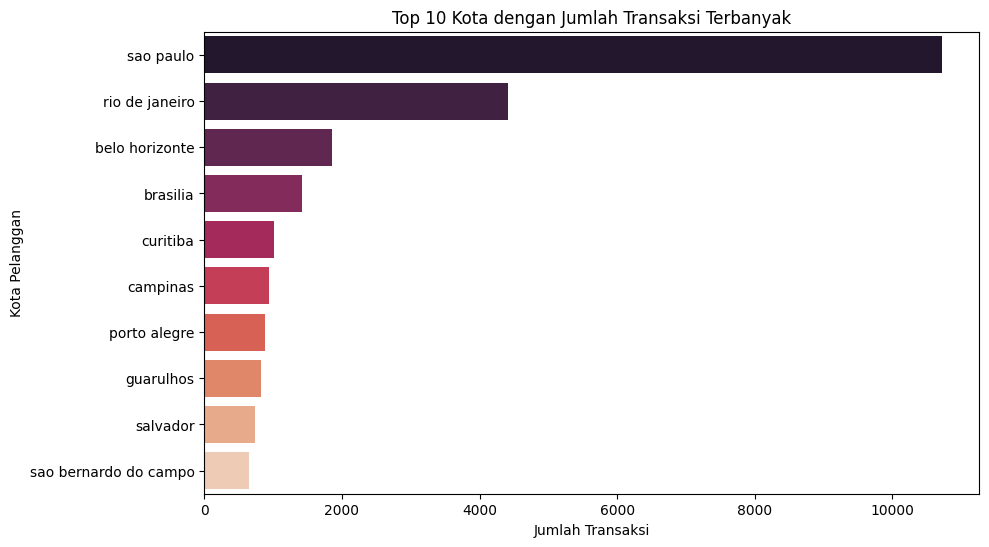

In [15]:
import seaborn as sns


# Hitung jumlah transaksi per kota
city_sales = table.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False)


# Tampilkan 10 kota dengan transaksi terbanyak
top_cities = city_sales.head(10)
print(top_cities)


# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="rocket")
plt.title("Top 10 Kota dengan Jumlah Transaksi Terbanyak")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Kota Pelanggan")
plt.show()


### Pertanyaan 3:  
**3. Metode Pembayaran Apa yang Paling Sering Digunakan?**  
*   Dengan melihat metode pembayaran yang paling sering digunakan oleh pelanggan, kita bisa memahami **preferensi pembayaran pelanggan**, apakah mereka lebih banyak menggunakan kartu kredit, transfer bank, atau metode lainnya.  



**Langkah Analisis Data** 

* Hitung jumlah pembelian berdasarkan metode pembayaran

* Gunakan pivot table untuk memudahkan visualisasi (bar chart)

* Gunakan bar chart untuk melihat metode pembayaran yang paling sering digunakan

payment_type
credit_card    53791
boleto         14731
voucher         4331
debit_card      1159
not_defined        3
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_2376\2420657354.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


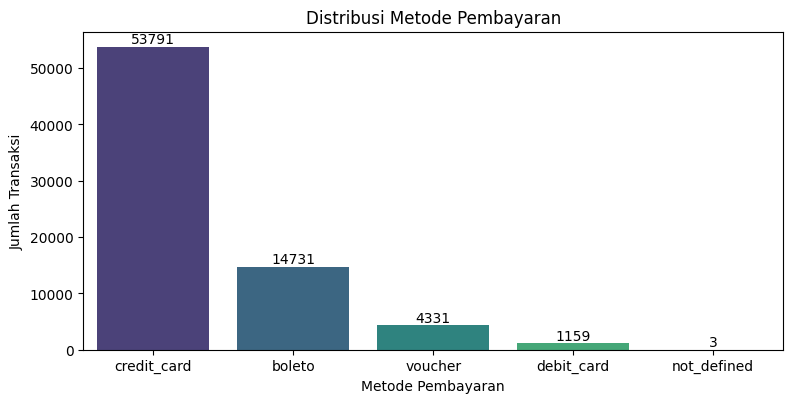

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data jumlah transaksi per metode pembayaran
payment_counts = table['payment_type'].value_counts()
print(payment_counts.head())


# Plot menggunakan bar chart vertikal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")

# Tambahkan label dan judul
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Distribusi Metode Pembayaran")

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(payment_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')



# Sesuaikan tata letak agar tabel tidak tertutup grafik
plt.subplots_adjust(left=0.2, bottom=0.35)

plt.show()


**Insight:**  
**1. Produk dari Kategori yang Paling Banyak Dibeli (Top 5 Bulan)**
Berikut adalah **5 bulan dengan jumlah pembelian terbanyak** berdasarkan data:

| Bulan     | Kategori Produk    | Jumlah Pembelian |
|-----------|-------------------|------------------|
| 2017-11   | cama_mesa_banho   | 965              |
| 2018-01   | cama_mesa_banho   | 893              |
| 2018-02   | informatica_acessorios | 744       |
| 2018-03   | cama_mesa_banho   | 735              |
| 2018-06   | beleza_saude      | 620              |

**Insight:**  
- **Kategori `cama_mesa_banho` mendominasi penjualan sepanjang 2017 hingga awal 2018**, dengan puncaknya pada November 2017 (**965 pesanan**) dan Januari 2018 (**893 pesanan**).
- **Lonjakan signifikan terjadi pada Februari 2018 untuk `informatica_acessorios`**, yang mencapai **744 pesanan**, menandakan adanya tren atau permintaan khusus di kategori teknologi.
- **Kategori `beleza_saude` mengalami peningkatan tajam sejak pertengahan 2018**, dengan jumlah pembelian tertinggi di Juni 2018 (**620 pesanan**), menunjukkan adanya perubahan preferensi pelanggan.
- **Tren bergeser dari produk rumah tangga ke produk kecantikan dan teknologi pada 2018**, yang kemungkinan dipengaruhi oleh faktor eksternal seperti musim atau kampanye promosi.

---

## **2. Sebaran Penjualan Berdasarkan Kota Pelanggan**  

| Kota Pelanggan         | Jumlah Transaksi |
|-----------------------|------------------|
| São Paulo             | 10.725           |
| Rio de Janeiro        | 4.417            |
| Belo Horizonte        | 1.849            |
| Brasília             | 1.424            |
| Curitiba             | 1.007            |

### **Insight:**  
- **São Paulo tetap menjadi kota dengan transaksi tertinggi**, mencapai **10.725 pesanan**, menegaskan posisinya sebagai pasar utama.  
- **Rio de Janeiro dan Belo Horizonte juga memiliki volume transaksi yang signifikan**, menunjukkan potensi pasar yang kuat di kota-kota besar lainnya.  
- **Curitiba dan Brasília** memiliki lebih dari 1.000 transaksi, menunjukkan adanya peluang untuk memperluas penetrasi pasar dengan strategi pemasaran yang lebih agresif.  
- **Peluang ekspansi lebih lanjut** dapat difokuskan pada **kampanye iklan atau insentif bagi pelanggan di kota-kota besar lain** untuk meningkatkan transaksi di luar São Paulo.  


---

**3. Metode Pembayaran yang Paling Sering Digunakan**  

| Metode Pembayaran | Jumlah Transaksi |
|------------------|------------------|
| Credit Card     | 53.791           |
| Boleto          | 14.731           |
| Voucher         | 4.331            |
| Debit Card      | 1.159            |
| Not Defined     | 3                |

**Insight:**  
- **Kartu Kredit (Credit Card) tetap menjadi metode pembayaran utama**, dengan **53.791 transaksi**, menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran menggunakan kartu kredit.  
- **Boleto memiliki 14.731 transaksi**, yang menunjukkan masih ada sebagian pelanggan yang memilih metode pembayaran alternatif, kemungkinan karena tidak memiliki kartu kredit atau lebih nyaman dengan sistem pembayaran ini.  
- **Voucher dan Debit Card digunakan dalam jumlah yang lebih kecil**, masing-masing sebanyak **4.331 dan 1.159 transaksi**, menunjukkan bahwa segmen pengguna metode ini cukup terbatas.  
- **3 transaksi dengan metode Not Defined** perlu ditinjau lebih lanjut untuk memastikan tidak ada kesalahan pencatatan atau anomali dalam sistem pembayaran.  



## Analisis Lanjutan (Opsional)

 **Analisis Mendalam dari Data Penjualan dan Transaksi**

1. Analisis Tren Produk Terlaris Tiap Bulan
Berdasarkan data kategori produk, ditemukan bahwa **kategori tertentu mengalami lonjakan pembelian pada periode tertentu**, terutama **cama_mesa_banho**.

**Temuan Utama:**
- **Lonjakan Pembelian Seiring Waktu:**  
  - Pada awalnya, jumlah pembelian masih kecil, tetapi mengalami lonjakan signifikan pada **Januari dan Februari 2017**.  
  - Februari 2017 mencatat pembelian tertinggi (**1,780 transaksi**), yang jauh lebih tinggi dibandingkan bulan sebelumnya.
  
- **Peluang Strategi:**
  - **Analisis Musiman:** Jika lonjakan ini berulang setiap tahun, bisnis dapat **meningkatkan stok dan kampanye pemasaran menjelang bulan tersebut**.
  - **Evaluasi Faktor Pendorong:** Lonjakan bisa disebabkan oleh **diskon, tren pasar, atau faktor eksternal** (misalnya, musim atau event spesifik).
  - **Diversifikasi Produk:** Jika kategori tertentu mendominasi, maka bisa menjadi indikator untuk **memperluas varian produk dalam kategori tersebut**.

---

2. Sebaran Geografis Penjualan
Data menunjukkan bahwa **São Paulo mendominasi transaksi**, sementara kota-kota lainnya memiliki transaksi yang sangat terbatas.

**Temuan Utama:**
- **Ketimpangan Konsentrasi Pasar:**
  - São Paulo mencatat **99,441 transaksi**, sementara sebagian besar kota lainnya hanya memiliki **1 transaksi**.
  - Hal ini menunjukkan bahwa **pasar sangat terkonsentrasi di kota metropolitan besar**.

- **Peluang dan Tantangan:**
  - **Strategi Ekspansi:** Dengan ketimpangan ini, perusahaan dapat **mengidentifikasi kota-kota dengan potensi pertumbuhan dan meningkatkan pemasaran ke daerah tersebut**.
  - **Optimasi Logistik:** Jika penjualan lebih banyak terjadi di São Paulo, maka **optimasi gudang dan distribusi di wilayah ini dapat menekan biaya pengiriman dan mempercepat proses fulfillment**.
  - **Analisis Kesalahan Data:** Beberapa kota mungkin hanya memiliki sedikit transaksi karena **sampling error atau pencatatan yang tidak merata**.

---

3. Analisis Metode Pembayaran
Mayoritas pelanggan menggunakan **kartu kredit**, sedangkan metode lain seperti **boleto dan voucher** memiliki porsi yang jauh lebih kecil.

**Temuan Utama:**
- **Kartu Kredit Mendominasi:**  
  - **1,523,831 transaksi** menggunakan kartu kredit, menandakan bahwa mayoritas pelanggan lebih nyaman dengan metode ini.
  
- **Boleto Sebagai Alternatif Penting:**  
  - **19,784 transaksi** menggunakan boleto, yang meskipun kecil, tetap memiliki pangsa pasar yang signifikan.  
  - Hal ini bisa mengindikasikan bahwa masih ada segmen pelanggan yang **lebih memilih metode pembayaran berbasis tunai atau transfer bank**.

- **Kesempatan Pengembangan Metode Pembayaran:**
  - **Promosi untuk Boleto dan Debit Card:** Jika bisnis ingin mendorong metode pembayaran lain, dapat memberikan **insentif** seperti diskon tambahan untuk transaksi dengan boleto atau debit card.
  - **Diversifikasi Opsi Pembayaran:** Mengingat tren digitalisasi, **penambahan metode seperti e-wallet atau pembayaran instan** dapat meningkatkan kenyamanan pelanggan.
  - **Validasi Data Not Defined:** Terdapat **3 transaksi dengan metode tidak terdefinisi**, yang memerlukan pengecekan lebih lanjut untuk memastikan akurasi pencatatan data.

---

**Kesimpulan & Rekomendasi Bisnis**
Berdasarkan temuan di atas, berikut beberapa langkah strategis yang bisa diterapkan:

1. **Optimalisasi Stok dan Promosi Produk**
   - Mengantisipasi lonjakan permintaan di bulan-bulan tertentu dengan **meningkatkan stok dan menawarkan promo khusus**.
   - Menganalisis apakah **produk-produk terkait** (seperti produk dekorasi rumah lainnya) juga mengalami pola serupa.

2. **Ekspansi Pasar di Luar São Paulo**
   - Melakukan **riset lebih lanjut terhadap potensi pelanggan di kota-kota dengan transaksi rendah**.
   - **Menargetkan kampanye pemasaran** yang lebih luas agar dapat menjangkau lebih banyak pelanggan di berbagai kota.

3. **Diversifikasi Opsi Pembayaran**
   - Mengembangkan metode pembayaran digital lainnya seperti **e-wallet, QR payment, atau cicilan tanpa kartu kredit**.
   - Memberikan insentif tambahan untuk pelanggan yang menggunakan metode pembayaran selain kartu kredit guna **meningkatkan adopsi metode lain**.

Dengan strategi ini, bisnis dapat lebih **mengoptimalkan penjualan, memperluas jangkauan pasar, dan meningkatkan pengalaman pelanggan**.


## Conclusion

1. **kategori produk yang sering terjual setiap bulannya**  
   Kategori "cama_mesa_banho" menunjukkan tren peningkatan jumlah pembelian yang signifikan setiap bulannya, terutama pada Februari 2017 dengan 1780 pembelian. Namun, terdapat fluktuasi data, seperti penurunan tajam pada Desember 2016 yang mungkin disebabkan oleh anomali atau faktor musiman. Dengan pola ini, bisnis dapat mengoptimalkan strategi pemasaran, seperti meningkatkan stok dan promosi pada bulan-bulan dengan permintaan tinggi untuk memaksimalkan keuntungan.


2. **Optimalisasi Penjualan dan Distribusi**  
   São Paulo mendominasi transaksi, sehingga strategi pemasaran dan distribusi perlu difokuskan pada wilayah ini. Namun, ekspansi ke kota lain juga bisa menjadi peluang pertumbuhan baru dengan analisis lebih lanjut terhadap data pelanggan.  

2. **Diversifikasi Metode Pembayaran untuk Menjangkau Lebih Banyak Pelanggan**  
   Kartu kredit adalah metode pembayaran utama, tetapi masih ada segmen pelanggan yang menggunakan boleto dan metode lain. Dengan menawarkan lebih banyak opsi pembayaran seperti e-wallet atau cicilan tanpa kartu, bisnis dapat meningkatkan konversi dan kenyamanan pelanggan.  
